<h1> Histograms And Comparison Of Protrusion Lengths </h1>

<h2> 1. Imports and Data Loading </h2>

In [1]:
# Imports and Settings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

params = {'legend.fontsize': 28,
          'legend.handlelength': 2}


plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams.update(params)

In [2]:
# Load the data
apical_intact_length = pd.read_csv("apical_intact_length.csv")
apical_skinned_length = pd.read_csv("apical_skinned_length.csv")
apical_after_healing_length = pd.read_csv("apical_after_healing_length.csv")

basal_intact_length = pd.read_csv("basal_intact_length.csv")
basal_skinned_length = pd.read_csv("basal_skinned_length.csv")
basal_after_healing_length = pd.read_csv("basal_after_healing_length.csv")

In [ ]:
# Define the functions to make the plot
def makeHistogramDouble(df1, df2, label1, label2, color1, color2, saveName=None):
    plt.clf()

    bin_size = 15
    
    fig = plt.figure(figsize=(10,10))
    
    sns.distplot(df1.iloc[:,1].dropna(), kde=False, norm_hist=True, bins=12, color=color1, label="", hist_kws=dict(alpha=0.1));
    sns.kdeplot(df1.iloc[:,1].dropna(), bw=0.4, linestyle="-", color=color1, label=label1, lw=4.5)
    
    sns.distplot(df2.iloc[:,1].dropna(), kde=False, norm_hist=True, bins=12, color=color2, label="", hist_kws=dict(alpha=0.2));
    sns.kdeplot(df2.iloc[:,1].dropna(), bw=0.4, linestyle="-", color=color2, label=label2, lw=4.5)
    
    plt.legend()
    plt.ylabel('Density', fontsize=28)
    plt.xlabel('Protrusion Length 'r'$(\mu m)$', fontsize=28)
    plt.tick_params(labelsize=22)
    plt.xlim(0, 7)
    
    plt.yticks(np.arange(0, 0.5, step=0.1))  
    
    if saveName != None:
        plt.savefig(saveName, bbox_inches='tight', dpi=800)
        plt.show()
    else:
        plt.show()
        

        
def makeHistogram(df, color, saveName=None):
    plt.clf()
    bin_size = 15
    
    fig = plt.figure(figsize=(10,10))
    
   # sns.distplot(df.iloc[:,0].dropna());
    sns.distplot(df.iloc[:,1].dropna(), kde=False, norm_hist=True, bins=12, label="", color=color, hist_kws=dict(alpha=.2));
    sns.kdeplot(df.iloc[:,1].dropna(), bw=0.4, linestyle="-", color=color, lw=4.5, label="skin intact")
    
    
    plt.legend()
    plt.ylabel('Density', fontsize=28)
    plt.xlabel('Protrusion Length 'r'$(\mu m)$', fontsize=28)
    plt.tick_params(labelsize=22)
    
    
    if saveName != None:
        plt.savefig(saveName, bbox_inches='tight', dpi=800)
        plt.show()
    else:
        plt.show()
    

<h2> Apical Comparisons </h2>

<Figure size 432x288 with 0 Axes>

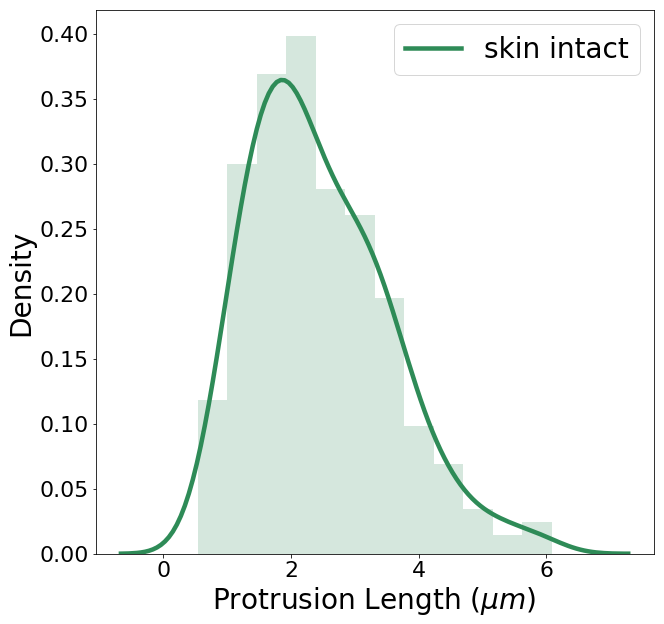

mean protrusion length = 2.449um


In [41]:
# Apical intact single histogram plot
makeHistogram(apical_intact_length, "seagreen")

In [3]:
# Print mean value for apical intact protrusion length
mean_length = apical_intact_length.mean()[0]
print("mean protrusion length = " + str(round(mean_length, 3))+"um")

mean protrusion length = 2.449um


<Figure size 432x288 with 0 Axes>

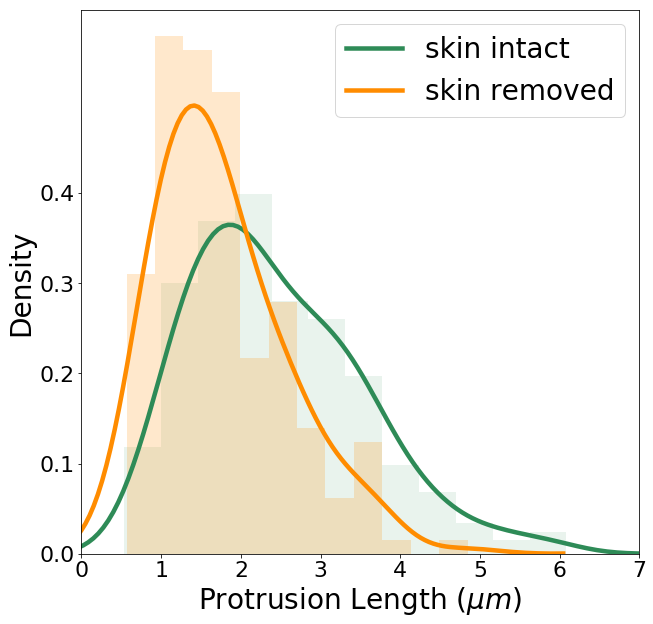

In [47]:
# Compare apical intact wtih apical skinned
makeHistogramDouble(apical_intact_length, apical_skinned_length, "skin intact", "skin removed", "seagreen", "darkorange")


In [59]:
# Print mean value for apical intact protrusion length
mean_length = apical_intact_length.mean()[0]
print("mean protrusion length for apical intact = " + str(round(mean_length, 3))+"um")

# Print mean value for skinned intact protrusion length
mean_length = apical_skinned_length.mean()[0]
print("mean protrusion length for apical skinned = " + str(round(mean_length, 3))+"um")

# Test for normality for apical intact
print('p-value for non-normality of apical intact is ' + str(stats.shapiro(apical_intact_length.iloc[:,1])[1]))

# Test for normality for apical skinned
print('p-value for non-normality of apical skinned is ' + str(stats.shapiro(apical_skinned_length.iloc[:,1])[1]))

# Perform a Mann-Swhitnet U Test

stats.mannwhitneyu(apical_intact_length.iloc[:,1], apical_skinned_length.iloc[:,1])



mean protrusion length for apical intact = 2.449um
mean protrusion length for apical skinned = 1.76um
p-value for non-normality of apical intact is 7.715944549957499e-10
p-value for non-normality of apical skinned is 1.962001476840669e-07


MannwhitneyuResult(statistic=24131.0, pvalue=5.740095306245274e-15)

<Figure size 432x288 with 0 Axes>

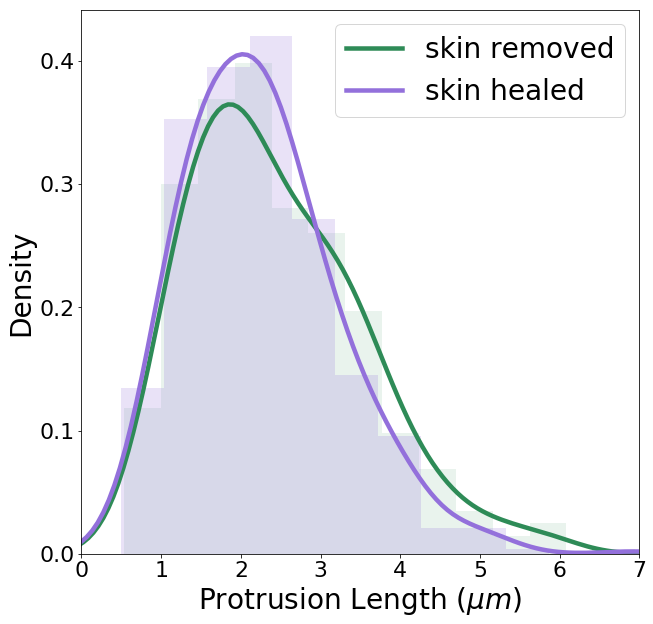

In [62]:
# Compare apical intact wtih apical healed
makeHistogramDouble(apical_intact_length, apical_after_healing_length, "skin removed", "skin healed", "seagreen", "mediumpurple")

In [65]:
# Print mean value for apical intact protrusion length
mean_length = apical_intact_length.mean()[0]
print("mean protrusion length for apical intact = " + str(round(mean_length, 3))+"um")

# Print mean value for apical healed protrusion length
mean_length = apical_after_healing_length.mean()[0]
print("mean protrusion length for apical after healing = " + str(round(mean_length, 3))+"um")

# Test for normality for apical intact
print('p-value for non-normality of apical intact is ' + str(stats.shapiro(apical_skinned_length.iloc[:,1])[1]))

# Test for normality for apical healed
print('p-value for non-normality of apical after_healing is ' + str(stats.shapiro(apical_after_healing_length.iloc[:,1])[1]))

# Perform a Mann-Swhitnet U Test

stats.mannwhitneyu(apical_intact_length.iloc[:,1], apical_after_healing_length.iloc[:,1])


mean protrusion length for apical intact = 2.449um
mean protrusion length for apical after healing = 2.26um
p-value for non-normality of apical intact is 1.962001476840669e-07
p-value for non-normality of apical after_healing is 1.2783342440148004e-10


MannwhitneyuResult(statistic=105969.5, pvalue=0.009319700302036781)

<h2> Basal Comparisons </h2>

<Figure size 432x288 with 0 Axes>

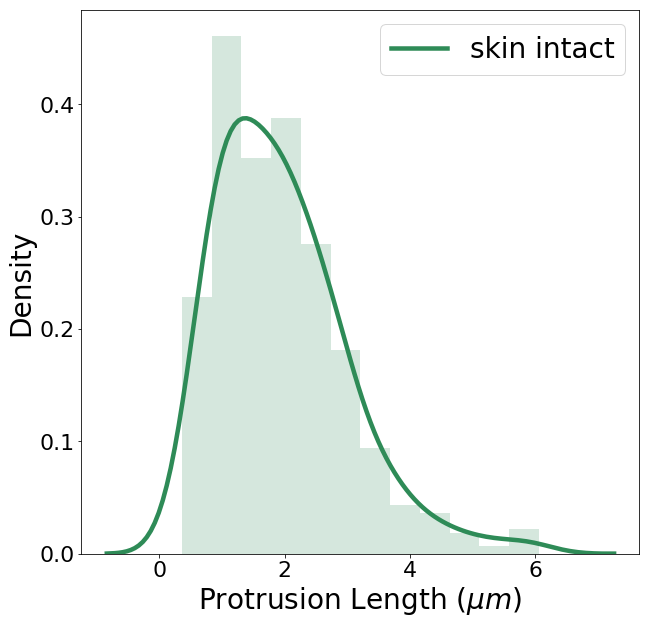

In [68]:
# Basal intact single histogram plot
makeHistogram(basal_intact_length, "seagreen")



In [4]:
# Print mean value for protrusion length
mean_length = basal_intact_length.mean()[0]
print("mean protrusion length = " + str(round(mean_length, 3))+"um")

mean protrusion length = 1.951um


<Figure size 432x288 with 0 Axes>

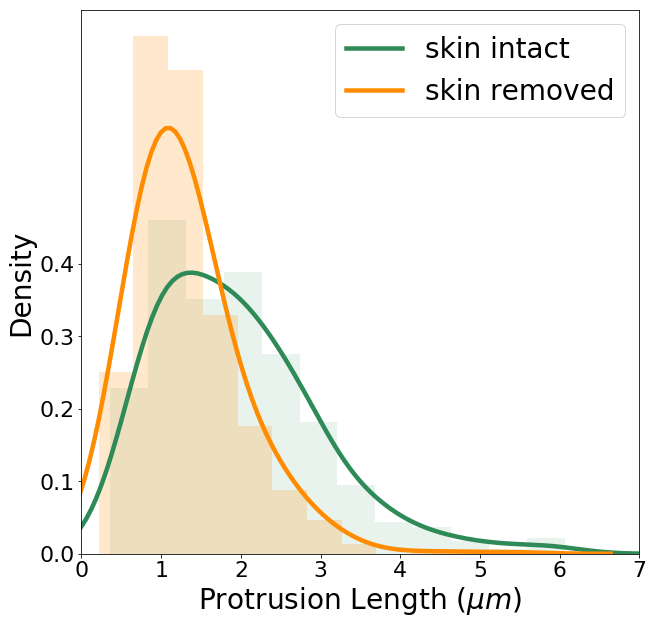

In [69]:
# Compare basal intact wtih basal skinned
makeHistogramDouble(basal_intact_length, basal_skinned_length, "skin intact", "skin removed", "seagreen", "darkorange")

In [70]:
# Print mean value for basal intact protrusion length
mean_length = basal_intact_length.mean()[0]
print("mean protrusion length for basal intact = " + str(round(mean_length, 3))+"um")

# Print mean value for skinned intact protrusion length
mean_length = basal_skinned_length.mean()[0]
print("mean protrusion length for basal skinned = " + str(round(mean_length, 3))+"um")

# Test for normality for basal intact
print('p-value for non-normality of basal intact is ' + str(stats.shapiro(basal_intact_length.iloc[:,1])[1]))

# Test for normality for basal skinned
print('p-value for non-normality of apical skinned is ' + str(stats.shapiro(basal_skinned_length.iloc[:,1])[1]))

# Perform a Mann-Swhitnet U Test

stats.mannwhitneyu(basal_intact_length.iloc[:,1], basal_skinned_length.iloc[:,1])

mean protrusion length for basal intact = 1.951um
mean protrusion length for basal skinned = 1.316um
p-value for non-normality of basal intact is 4.0581131450760795e-16
p-value for non-normality of apical skinned is 1.6964447005141807e-17


MannwhitneyuResult(statistic=87448.0, pvalue=4.382589451503846e-29)

<Figure size 432x288 with 0 Axes>

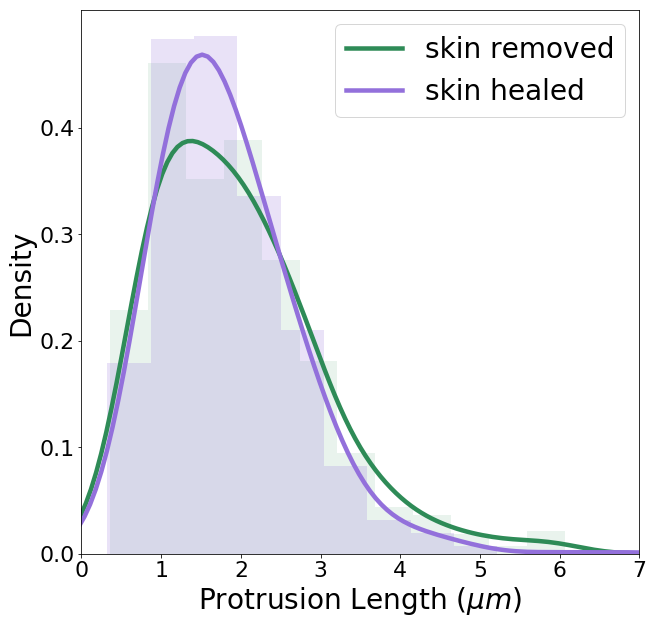

In [71]:
# Compare basal intact wtih basal healed
makeHistogramDouble(basal_intact_length, basal_after_healing_length, "skin removed", "skin healed", "seagreen", "mediumpurple")

In [72]:
# Print mean value for basal intact protrusion length
mean_length = basal_intact_length.mean()[0]
print("mean protrusion length for basal intact = " + str(round(mean_length, 3))+"um")

# Print mean value for basal healed protrusion length
mean_length = basal_after_healing_length.mean()[0]
print("mean protrusion length for basal after healing = " + str(round(mean_length, 3))+"um")

# Test for normality for basal intact
print('p-value for non-normality of apical intact is ' + str(stats.shapiro(basal_skinned_length.iloc[:,1])[1]))

# Test for normality for basal healed
print('p-value for non-normality of apical after_healing is ' + str(stats.shapiro(basal_after_healing_length.iloc[:,1])[1]))

# Perform a Mann-Swhitnet U Test

stats.mannwhitneyu(basal_intact_length.iloc[:,1], basal_after_healing_length.iloc[:,1])


mean protrusion length for basal intact = 1.951um
mean protrusion length for basal after healing = 1.83um
p-value for non-normality of apical intact is 1.6964447005141807e-17
p-value for non-normality of apical after_healing is 2.548009439472414e-17


MannwhitneyuResult(statistic=212249.0, pvalue=0.10492444128738876)

<Figure size 432x288 with 0 Axes>

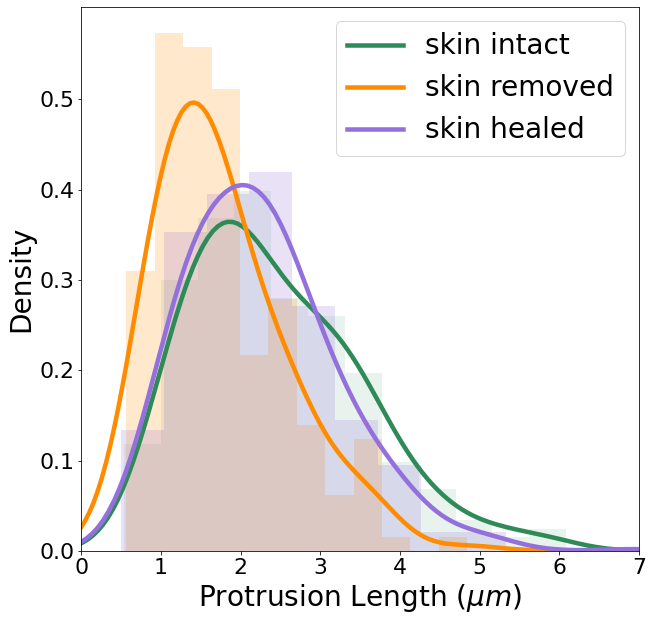

In [12]:
#make all histograms on same graph

plt.clf()

bin_size = 15

fig = plt.figure(figsize=(10,10))

sns.distplot(apical_intact_length.iloc[:,1].dropna(), kde=False, norm_hist=True, bins=12, color="seagreen", label="", hist_kws=dict(alpha=0.1));
sns.kdeplot(apical_intact_length.iloc[:,1].dropna(), bw=0.4, linestyle="-", color="seagreen", label="skin intact", lw=4.5)

sns.distplot(apical_skinned_length.iloc[:,1].dropna(), kde=False, norm_hist=True, bins=12, color="darkorange", label="", hist_kws=dict(alpha=0.2));
sns.kdeplot(apical_skinned_length.iloc[:,1].dropna(), bw=0.4, linestyle="-", color="darkorange", label="skin removed", lw=4.5)

sns.distplot(apical_after_healing_length.iloc[:,1].dropna(), kde=False, norm_hist=True, bins=12, color="mediumpurple", label="", hist_kws=dict(alpha=0.2));
sns.kdeplot(apical_after_healing_length.iloc[:,1].dropna(), bw=0.4, linestyle="-", color="mediumpurple", label="skin healed", lw=4.5)

plt.legend()
plt.ylabel('Density', fontsize=28)
plt.xlabel('Protrusion Length 'r'$(\mu m)$', fontsize=28)
plt.tick_params(labelsize=22)
plt.xlim(0, 7)

plt.yticks(np.arange(0, 0.6, step=0.1))  

plt.savefig('apical_histograms.png', bbox_inches='tight', dpi=800)


plt.show()



        

<Figure size 432x288 with 0 Axes>

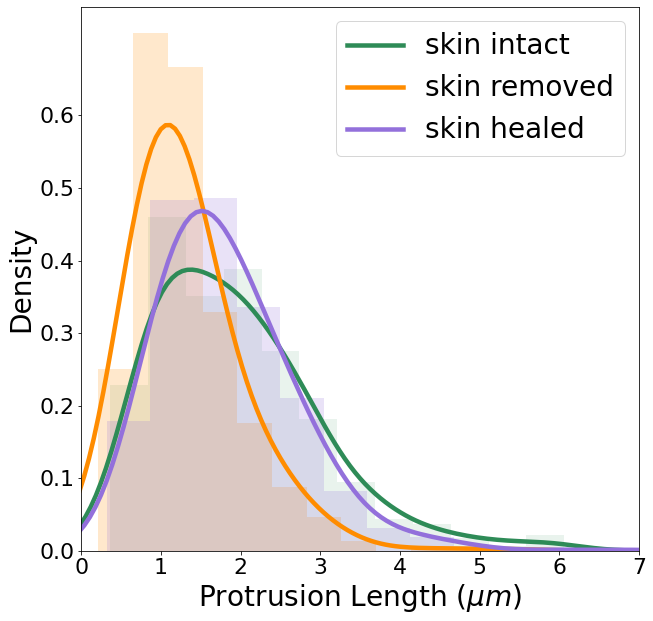

In [13]:
plt.clf()

bin_size = 15

fig = plt.figure(figsize=(10,10))

sns.distplot(basal_intact_length.iloc[:,1].dropna(), kde=False, norm_hist=True, bins=12, color="seagreen", label="", hist_kws=dict(alpha=0.1));
sns.kdeplot(basal_intact_length.iloc[:,1].dropna(), bw=0.4, linestyle="-", color="seagreen", label="skin intact", lw=4.5)

sns.distplot(basal_skinned_length.iloc[:,1].dropna(), kde=False, norm_hist=True, bins=12, color="darkorange", label="", hist_kws=dict(alpha=0.2));
sns.kdeplot(basal_skinned_length.iloc[:,1].dropna(), bw=0.4, linestyle="-", color="darkorange", label="skin removed", lw=4.5)

sns.distplot(basal_after_healing_length.iloc[:,1].dropna(), kde=False, norm_hist=True, bins=12, color="mediumpurple", label="", hist_kws=dict(alpha=0.2));
sns.kdeplot(basal_after_healing_length.iloc[:,1].dropna(), bw=0.4, linestyle="-", color="mediumpurple", label="skin healed", lw=4.5)

plt.legend()
plt.ylabel('Density', fontsize=28)
plt.xlabel('Protrusion Length 'r'$(\mu m)$', fontsize=28)
plt.tick_params(labelsize=22)
plt.xlim(0, 7)

plt.yticks(np.arange(0, 0.7, step=0.1))  

plt.savefig('basal_histograms.png', bbox_inches='tight', dpi=800)


plt.show()
       

    